Testing with a smaller batch size

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from interstellar import Tracks, DenseNetworkGrid, set_seed

In [2]:
name = 'grid_07'
save_path = f'/home/ADF/ajl573/Data/interstellar_data/{name}'
load_path = '/home/ADF/ajl573/Data/interstellar_data/tracks_02'

In [3]:
tracks = Tracks()
tracks.load(load_path)

In [4]:
tracks.get_metadata().head()

,file_name,m,Y,FeH,MLT,ov,dif
0,m1.0Y0.24FeH-0.1MLT2.3ov0.0dif1.csv,1.00,0.24,-0.1,2.3,0.0,1
1,m0.92Y0.28FeH-0.3MLT1.7ov0.0dif1.csv,0.92,0.28,-0.3,1.7,0.0,1
2,m0.82Y0.32FeH0.1MLT2.1ov0.0dif1.csv,0.82,0.32,0.1,2.1,0.0,1
3,m0.82Y0.24FeH0.0MLT1.9ov0.0dif1.csv,0.82,0.24,0.0,1.9,0.0,1
4,m1.17Y0.28FeH0.1MLT2.3ov0.0dif1.csv,1.17,0.28,0.1,2.3,0.0,1


In [5]:
tracks.get_data().head()

,evol_stage,initial_feh,star_mass,luminosity,log_g,star_feh,log_frac_age,log_initial_mass,log_initial_MLT,log_initial_Yinit,...,log_initial_MLT_norm,log_initial_Yinit_norm,log_initial_Z_norm,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,star_feh_norm,log_surface_he4_norm,log_surface_Z_norm
0,1,-0.1,1.0,0.760630,4.560423,-0.100188,-2.394550,0.0,0.361728,-0.619789,...,0.082728,-0.066789,-0.074825,-2.172096,0.009556,-0.153267,0.227380,-0.005188,0.002002,-0.011841
1,1,-0.1,1.0,0.749957,4.564024,-0.100198,-2.385753,0.0,0.361728,-0.619789,...,0.082728,-0.066789,-0.074825,-2.163299,0.008922,-0.155067,0.230071,-0.005198,0.001994,-0.011848
2,1,-0.1,1.0,0.741406,4.566707,-0.100209,-2.375426,0.0,0.361728,-0.619789,...,0.082728,-0.066789,-0.074825,-2.152973,0.008348,-0.156409,0.232081,-0.005209,0.001984,-0.011856
3,1,-0.1,1.0,0.735484,4.568303,-0.100221,-2.363350,0.0,0.361728,-0.619789,...,0.082728,-0.066789,-0.074825,-2.140897,0.007876,-0.157207,0.233283,-0.005221,0.001973,-0.011865
4,1,-0.1,1.0,0.732361,4.568802,-0.100238,-2.349288,0.0,0.361728,-0.619789,...,0.082728,-0.066789,-0.074825,-2.126835,0.007539,-0.157456,0.233670,-0.005238,0.001958,-0.011876


In [6]:
x_cols = ['log_frac_age_norm', 'log_initial_mass_norm','log_initial_MLT_norm', 
          'log_initial_Yinit_norm', 'log_initial_Z_norm']
y_cols = ['log_star_age_norm', 'log_effective_T_norm', 'log_radius_norm',
          'log_delta_nu_fit_norm', 'log_surface_he4_norm', 'log_surface_Z_norm']

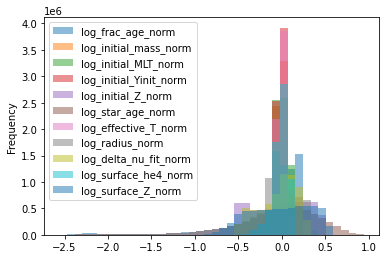

In [7]:
tracks.get_data().plot(kind='hist',
                       y=x_cols+y_cols,
                       bins=40, alpha=0.5)

In [19]:
set_seed(101)
data = tracks.sample_data(fraction=1.0, columns=x_cols+y_cols)
data.head()

,log_frac_age_norm,log_initial_mass_norm,log_initial_MLT_norm,log_initial_Yinit_norm,log_initial_Z_norm,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,log_surface_he4_norm,log_surface_Z_norm
5323617,-0.413108,-0.066581,0.082728,0.000158,-0.098340,-0.120701,-0.005829,-0.186181,0.241946,0.035663,-0.064664
4920966,0.165619,0.083181,-0.000246,0.030121,0.471477,0.150685,-0.074867,0.292421,-0.399550,0.089082,0.526601
2948371,-0.273604,0.064698,-0.102909,-0.032027,0.011987,-0.388764,0.024218,0.018269,0.001753,-0.102742,-0.052748
229413,-0.588613,-0.046610,0.082728,0.030121,-0.110549,-0.448798,0.013448,-0.168372,0.224419,0.077867,-0.066061
1054345,-0.196777,-0.018276,-0.048551,0.030121,0.376348,0.090103,-0.034648,-0.105347,0.148099,0.052552,0.400300


In [20]:
train = data.head(int(0.8*len(data)) + 1)
val = data.tail(int(0.2*len(data)))

In [21]:
print(f'Length of training data = {len(train)}')
print(f'Length of validation data = {len(val)}')

Length of training data = 5163732
Length of validation data = 1290932


In [22]:
depth = [5, 6]
width = [128]
activation = 'elu'
batch_size = len(train)//1350
regularization_l2 = 0.0
optimizer = 'nadam'
loss = 'mae'
metrics = ['mse']

In [23]:
grid = DenseNetworkGrid(path=save_path, name=name, depth=depth, width=width,
                        activation=activation, batch_size=batch_size, regularization_l2=regularization_l2)

grid.data

,depth,width,activation,batch_size,regularization_l2
name,,,,,
grid_07_0,5,128,elu,3824,0.0
grid_07_1,6,128,elu,3824,0.0


In [24]:
grid.make_networks()

In [25]:
grid.build_all(len(x_cols), len(y_cols))

In [31]:
grid.compile_all(optimizer=optimizer, loss=loss, metrics=metrics)

In [32]:
data = None

In [33]:
grid.train_all(train, x_cols, y_cols, epochs=30, validation_data=val, validation_split=None,
               callbacks=['checkpoint', 'tensorboard'], history_kw={'nth_row': 5})

Add a function which plots history for all networks.

Text(0, 0.5, 'loss (mae)')

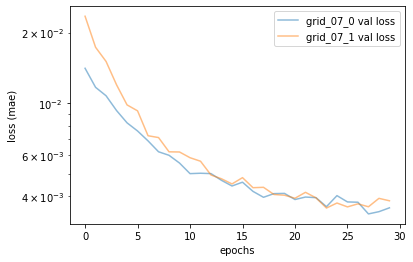

In [34]:
fig, ax = plt.subplots()
for network in grid.networks:
    network.history.plot(ax=ax, x='epochs', y=['val_loss'], logy=True, alpha=0.5,
                         label=[f'{network.name} val loss'])
ax.set_ylabel('loss (mae)')

In [35]:
val = train.tail(int(0.2*len(train)))
val.head()

,log_frac_age_norm,log_initial_mass_norm,log_initial_MLT_norm,log_initial_Yinit_norm,log_initial_Z_norm,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,log_surface_he4_norm,log_surface_Z_norm
6072794,0.081435,0.004000,0.082728,-0.066789,0.023575,0.269615,0.009646,-0.004229,0.007587,-0.080536,0.018733
1851179,0.193231,0.037424,-0.000246,0.030121,0.280230,0.206786,-0.052038,0.217649,-0.306622,0.080640,0.329927
4587037,-0.140635,-0.022872,-0.000246,0.058150,0.363700,0.077873,-0.018387,-0.106142,0.146340,0.079828,0.386791
4266196,0.072691,0.083181,-0.102909,0.058150,-0.320819,-0.408275,0.076288,0.154660,-0.217537,-0.065520,-0.422760
1413503,-0.799338,0.025189,-0.102909,-0.066789,-0.173558,-0.791236,0.014595,-0.073245,0.118599,-0.026977,-0.137371


In [36]:
grid.evaluate_all(val.sample(n=1000))

,mae,mse
name,,
grid_07_0,0.003444,0.000034
grid_07_1,0.003780,0.000038


In [37]:
grid.data

,depth,width,activation,batch_size,regularization_l2,model_filename,history_filename
name,,,,,,,
grid_07_0,5,128,elu,3824,0.0,grid_07_0_model.h5,grid_07_0_history.csv
grid_07_1,6,128,elu,3824,0.0,grid_07_1_model.h5,grid_07_1_history.csv


In [38]:
import seaborn as sns

In [39]:
len(val)

1032746

In [40]:
val = val.sample(n=10000)

In [41]:
df_dict = {}
for i, network in enumerate(grid.networks):
#     network = grid.networks[i]
    df_dict[network.name] = np.abs(network.predict(val) - val[y_cols].reset_index(drop=True))

In [42]:
df_err = pd.concat(df_dict).reset_index(level=0).rename(columns={'level_0': 'name'})
df_err.head()

,name,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,log_surface_he4_norm,log_surface_Z_norm
0,grid_07_0,0.004974,0.001347,0.016496,0.025085,0.002896,0.006276
1,grid_07_0,0.001262,0.000300,0.002303,0.005812,0.001063,0.003447
2,grid_07_0,0.001126,0.001254,0.002199,0.003876,0.003080,0.003728
3,grid_07_0,0.002500,0.000105,0.000291,0.001060,0.000777,0.000484
4,grid_07_0,0.000088,0.001444,0.002034,0.004211,0.002393,0.001214


In [43]:
df_mae = pd.concat(df_dict).mean(axis=1).reset_index(level=0).rename(columns={'level_0': 'name', 0: 'mae'})
df_mae.head()

,name,mae
0,grid_07_0,0.009512
1,grid_07_0,0.002365
2,grid_07_0,0.002544
3,grid_07_0,0.000869
4,grid_07_0,0.001897


In [44]:
df_mae['log_mae'] = np.log10(df_mae['mae'])

In [45]:
order = df_mae.set_index('name').median(level=0).sort_values('log_mae', ascending=False).index

In [46]:
df_err.head()

,name,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,log_surface_he4_norm,log_surface_Z_norm
0,grid_07_0,0.004974,0.001347,0.016496,0.025085,0.002896,0.006276
1,grid_07_0,0.001262,0.000300,0.002303,0.005812,0.001063,0.003447
2,grid_07_0,0.001126,0.001254,0.002199,0.003876,0.003080,0.003728
3,grid_07_0,0.002500,0.000105,0.000291,0.001060,0.000777,0.000484
4,grid_07_0,0.000088,0.001444,0.002034,0.004211,0.002393,0.001214


In [47]:
df_err_col = df_err.set_index('name').stack().reset_index().rename(columns={'level_1': 'output',
                                                                0: 'abs_err'})

df_err_col['log_abs_err'] = np.log10(df_err_col['abs_err'])

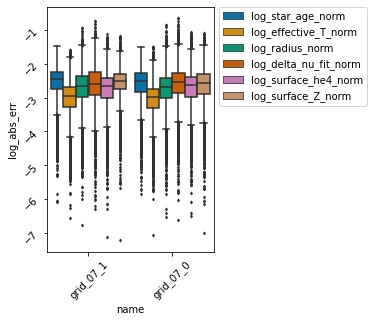

In [48]:
w = 1.5 * len(grid.data)
fig, ax = plt.subplots(figsize=(w, 4.5))
width = 0.15 * len(y_cols)
sns.boxplot(data=df_err_col, x='name', y='log_abs_err', hue='output',
            width=width, fliersize=2, color='C0', palette='colorblind',
            order=order, ax=ax, saturation=0.9)
# ax.set_yscale('log')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
ax.legend(bbox_to_anchor=(1.0, 1.02))

In [49]:
scores = grid.score_all(val)

In [50]:
scores.xs('std', level=1)

,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,log_surface_he4_norm,log_surface_Z_norm
grid_07_0,0.003434,0.002180,0.005678,0.008703,0.004530,0.004305
grid_07_1,0.003765,0.002048,0.005965,0.009204,0.003553,0.003816
